In [1]:
library(tidyverse)
library(tximport)
library(org.Hs.eg.db)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The fo

In [2]:
tx2gene <- read.table("./transcripts_to_genes.txt", sep="	", header=FALSE)
#Removing version numbers from V2.
tx2gene

V1,V2,V3
<chr>,<chr>,<chr>
ENST00000456328.2,ENSG00000223972.5,DDX11L1
ENST00000450305.2,ENSG00000223972.5,DDX11L1
ENST00000488147.1,ENSG00000227232.5,WASH7P
ENST00000619216.1,ENSG00000278267.1,MIR6859-1
ENST00000473358.1,ENSG00000243485.5,MIR1302-2HG
ENST00000469289.1,ENSG00000243485.5,MIR1302-2HG
ENST00000607096.1,ENSG00000284332.1,MIR1302-2
ENST00000417324.1,ENSG00000237613.2,FAM138A
ENST00000461467.1,ENSG00000237613.2,FAM138A


In [3]:
#Gene versions may be removed.
length(unique(tx2gene$V2)) == length(unique(str_sub(tx2gene$V2, 1, 15)))

[1] TRUE

In [4]:
tx2gene["V2"] <- str_sub(tx2gene$V2, 1, 15)
tx2gene

V1,V2,V3
<chr>,<chr>,<chr>
ENST00000456328.2,ENSG00000223972,DDX11L1
ENST00000450305.2,ENSG00000223972,DDX11L1
ENST00000488147.1,ENSG00000227232,WASH7P
ENST00000619216.1,ENSG00000278267,MIR6859-1
ENST00000473358.1,ENSG00000243485,MIR1302-2HG
ENST00000469289.1,ENSG00000243485,MIR1302-2HG
ENST00000607096.1,ENSG00000284332,MIR1302-2
ENST00000417324.1,ENSG00000237613,FAM138A
ENST00000461467.1,ENSG00000237613,FAM138A


In [5]:
filelist <- read.csv("./results/files.txt", header=FALSE)[["V1"]]
filelist

[1] "A10_S169/abundance.h5" "A10_S265/abundance.h5" "A10_S73/abundance.h5" 
  [4] "A11_S177/abundance.h5" "A11_S273/abundance.h5" "A11_S81/abundance.h5" 
  [7] "A12_S185/abundance.h5" "A12_S281/abundance.h5" "A12_S89/abundance.h5" 
 [10] "A1_S193/abundance.h5"  "A1_S1/abundance.h5"    "A1_S97/abundance.h5"  
 [13] "A2_S105/abundance.h5"  "A2_S201/abundance.h5"  "A2_S9/abundance.h5"   
 [16] "A3_S113/abundance.h5"  "A3_S17/abundance.h5"   "A3_S209/abundance.h5" 
 [19] "A4_S121/abundance.h5"  "A4_S217/abundance.h5"  "A4_S25/abundance.h5"  
 [22] "A5_S129/abundance.h5"  "A5_S225/abundance.h5"  "A5_S33/abundance.h5"  
 [25] "A6_S137/abundance.h5"  "A6_S233/abundance.h5"  "A6_S41/abundance.h5"  
 [28] "A7_S145/abundance.h5"  "A7_S241/abundance.h5"  "A7_S49/abundance.h5"  
 [31] "A8_S153/abundance.h5"  "A8_S249/abundance.h5"  "A8_S57/abundance.h5"  
 [34] "A9_S161/abundance.h5"  "A9_S257/abundance.h5"  "A9_S65/abundance.h5"  
 [37] "B10_S170/abundance.h5" "B10_S266/abundance.h5" "B10_S74/abundance.h5" 
 [40] "B11_S178/abundance.h5" "B11_S274/abundance.h5" "B11_S82/abundance.h5" 
 [43] "B12_S186/abundance.h5" "B12_S282/abundance.h5" "B12_S90/abundance.h5" 
 [46] "B1_S194/abundance.h5"  "B1_S2/abundance.h5"    "B1_S98/abundance.h5"  
 [49] "B2_S106/abundance.h5"  "B2_S10/abundance.h5"   "B2_S202/abundance.h5" 
 [52] "B3_S114/abundance.h5"  "B3_S18/abundance.h5"   "B3_S210/abundance.h5" 
 [55] "B4_S122/abundance.h5"  "B4_S218/abundance.h5"  "B4_S26/abundance.h5"  
 [58] "B5_S130/abundance.h5"  "B5_S226/abundance.h5"  "B5_S34/abundance.h5"  
 [61] "B6_S138/abundance.h5"  "B6_S234/abundance.h5"  "B6_S42/abundance.h5"  
 [64] "B7_S146/abundance.h5"  "B7_S242/abundance.h5"  "B7_S50/abundance.h5"  
 [67] "B8_S154/abundance.h5"  "B8_S250/abundance.h5"  "B8_S58/abundance.h5"  
 [70] "B9_S162/abundance.h5"  "B9_S258/abundance.h5"  "B9_S66/abundance.h5"  
 [73] "C10_S171/abundance.h5" "C10_S267/abundance.h5" "C10_S75/abundance.h5" 
 [76] "C11_S179/abundance.h5" "C11_S275/abundance.h5" "C11_S83/abundance.h5" 
 [79] "C12_S187/abundance.h5" "C12_S283/abundance.h5" "C12_S91/abundance.h5" 
 [82] "C1_S195/abundance.h5"  "C1_S3/abundance.h5"    "C1_S99/abundance.h5"  
 [85] "C2_S107/abundance.h5"  "C2_S11/abundance.h5"   "C2_S203/abundance.h5" 
 [88] "C3_S115/abundance.h5"  "C3_S19/abundance.h5"   "C3_S211/abundance.h5" 
 [91] "C4_S123/abundance.h5"  "C4_S219/abundance.h5"  "C4_S27/abundance.h5"  
 [94] "C5_S131/abundance.h5"  "C5_S227/abundance.h5"  "C5_S35/abundance.h5"  
 [97] "C6_S139/abundance.h5"  "C6_S235/abundance.h5"  "C6_S43/abundance.h5"  
[100] "C7_S147/abundance.h5"  "C7_S243/abundance.h5"  "C7_S51/abundance.h5"  
[103] "C8_S155/abundance.h5"  "C8_S251/abundance.h5"  "C8_S59/abundance.h5"  
[106] "C9_S163/abundance.h5"  "C9_S259/abundance.h5"  "C9_S67/abundance.h5"  
[109] "D10_S172/abundance.h5" "D10_S268/abundance.h5" "D10_S76/abundance.h5" 
[112] "D11_S180/abundance.h5" "D11_S276/abundance.h5" "D11_S84/abundance.h5" 
[115] "D12_S188/abundance.h5" "D12_S284/abundance.h5" "D12_S92/abundance.h5" 
[118] "D1_S100/abundance.h5"  "D1_S196/abundance.h5"  "D1_S4/abundance.h5"   
[121] "D2_S108/abundance.h5"  "D2_S12/abundance.h5"   "D2_S204/abundance.h5" 
[124] "D3_S116/abundance.h5"  "D3_S20/abundance.h5"   "D3_S212/abundance.h5" 
[127] "D4_S124/abundance.h5"  "D4_S220/abundance.h5"  "D4_S28/abundance.h5"  
[130] "D5_S132/abundance.h5"  "D5_S228/abundance.h5"  "D5_S36/abundance.h5"  
[133] "D6_S140/abundance.h5"  "D6_S236/abundance.h5"  "D6_S44/abundance.h5"  
[136] "D7_S148/abundance.h5"  "D7_S244/abundance.h5"  "D7_S52/abundance.h5"  
[139] "D8_S156/abundance.h5"  "D8_S252/abundance.h5"  "D8_S60/abundance.h5"  
[142] "D9_S164/abundance.h5"  "D9_S260/abundance.h5"  "D9_S68/abundance.h5"  
[145] "E10_S173/abundance.h5" "E10_S269/abundance.h5" "E10_S77/abundance.h5" 
[148] "E11_S181/abundance.h5" "E11_S277/abundance.h5" "E11_S85/abundance.h5" 
[151] "E12_S189/abundance.h5" "E12_S285/abundance.h5" "E12_S93/abundance.h5" 
[154] "E1_S101/abundance

In [6]:
files <- file.path(".", "results", filelist)
names(files) <- str_sub(filelist, 1, -14)
files

A10_S169                          A10_S265 
"./results/A10_S169/abundance.h5" "./results/A10_S265/abundance.h5" 
                          A10_S73                          A11_S177 
 "./results/A10_S73/abundance.h5" "./results/A11_S177/abundance.h5" 
                         A11_S273                           A11_S81 
"./results/A11_S273/abundance.h5"  "./results/A11_S81/abundance.h5" 
                         A12_S185                          A12_S281 
"./results/A12_S185/abundance.h5" "./results/A12_S281/abundance.h5" 
                          A12_S89                           A1_S193 
 "./results/A12_S89/abundance.h5"  "./results/A1_S193/abundance.h5" 
                            A1_S1                            A1_S97 
   "./results/A1_S1/abundance.h5"   "./results/A1_S97/abundance.h5" 
                          A2_S105                           A2_S201 
 "./results/A2_S105/abundance.h5"  "./results/A2_S201/abundance.h5" 
                            A2_S9                           A3_S113 
   "./results/A2_S9/abundance.h5"  "./results/A3_S113/abundance.h5" 
                           A3_S17                           A3_S209 
  "./results/A3_S17/abundance.h5"  "./results/A3_S209/abundance.h5" 
                          A4_S121                           A4_S217 
 "./results/A4_S121/abundance.h5"  "./results/A4_S217/abundance.h5" 
                           A4_S25                           A5_S129 
  "./results/A4_S25/abundance.h5"  "./results/A5_S129/abundance.h5" 
                          A5_S225                            A5_S33 
 "./results/A5_S225/abundance.h5"   "./results/A5_S33/abundance.h5" 
                          A6_S137                           A6_S233 
 "./results/A6_S137/abundance.h5"  "./results/A6_S233/abundance.h5" 
                           A6_S41                           A7_S145 
  "./results/A6_S41/abundance.h5"  "./results/A7_S145/abundance.h5" 
                          A7_S241                            A7_S49 
 "./results/A7_S241/abundance.h5"   "./results/A7_S49/abundance.h5" 
                          A8_S153                           A8_S249 
 "./results/A8_S153/abundance.h5"  "./results/A8_S249/abundance.h5" 
                           A8_S57                           A9_S161 
  "./results/A8_S57/abundance.h5"  "./results/A9_S161/abundance.h5" 
                          A9_S257                            A9_S65 
 "./results/A9_S257/abundance.h5"   "./results/A9_S65/abundance.h5" 
                         B10_S170                          B10_S266 
"./results/B10_S170/abundance.h5" "./results/B10_S266/abundance.h5" 
                          B10_S74                          B11_S178 
 "./results/B10_S74/abundance.h5" "./results/B11_S178/abundance.h5" 
                         B11_S274                           B11_S82 
"./results/B11_S274/abundance.h5"  "./results/B11_S82/abundance.h5" 
                         B12_S186                          B12_S282 
"./results/B12_S186/abundance.h5" "./results/B12_S282/abundance.h5" 
                          B12_S90                           B1_S194 
 "./results/B12_S90/abundance.h5"  "./results/B1_S194/abundance.h5" 
                            B1_S2                            B1_S98 
   "./results/B1_S2/abundance.h5"   "./results/B1_S98/abundance.h5" 
                          B2_S106                            B2_S10 
 "./results/B2_S106/abundance.h5"   "./results/B2_S10/abundance.h5" 
                          B2_S202                           B3_S114 
 "./results/B2_S202/abundance.h5"  "./results/B3_S114/abundance.h5" 
                           B3_S18                           B3_S210 
  "./results/B3_S18/abundance.h5"  "./results/B3_S210/abundance.h5" 
                          B4_S122                           B4_S218 
 "./results/B4_S122/abundance.h5"  "./results/B4_S218/abundance.h5" 
                           B4_S26                           B5_S130 
  "./results/B4_S26/abundance.h5"  "./results/B5_S130/abundance.h5" 
                       

In [7]:
kallisto <- tximport(files, type = "kallisto", tx2gene = tx2gene, ignoreAfterBar = TRUE)

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 
119 
120 
121 
122 
123 
124 
125 
126 
127 
128 
129 
130 
131 
132 
133 
134 
135 
136 
137 
138 
139 
140 
141 
142 
143 
144 
145 
146 
147 
148 
149 
150 
151 
152 
153 
154 
155 
156 
157 
158 
159 
160 
161 
162 
163 
164 
165 
166 
167 
168 
169 
170 
171 
172 
173 
174 
175 
176 
177 
178 
179 
180 
181 
182 
183 
184 
185 
186 
187 
188 
189 
190 
191 
192 
193 
194 
195 
196 
197 
198 
199 
200 
201 
202 
203 
204 
205 
206 
207 
208 
209 
210 
211 
212 
213 
214 
215 
216 
217 
218 
219 
220 
221 
222

In [8]:
kallisto$counts

,A10_S169,A10_S265,A10_S73,A11_S177,A11_S273,A11_S81,A12_S185,A12_S281,A12_S89,A1_S193,⋯,H6_S48,H7_S152,H7_S248,H7_S56,H8_S160,H8_S256,H8_S64,H9_S168,H9_S264,H9_S72
ENSG00000000003,0,19.000000,0,21.7630289,24.0000000,156.000000,40.000000,17.000000,0,0,⋯,0,20.000000,12.00000,257.000000,0,30.000000,65.984372,19.000000,0,72.000000
ENSG00000000005,0,0.000000,0,0.0000000,0.0000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000000419,0,33.000000,0,295.0000000,47.0000000,106.000000,125.000000,49.000000,0,0,⋯,0,150.000000,22.00000,230.000000,0,47.000000,98.000000,159.000000,0,271.000000
ENSG00000000457,0,4.079180,0,35.0816980,17.3721133,5.189310,67.791847,8.290345,0,0,⋯,0,6.485439,13.07831,69.003314,0,9.000000,7.020283,28.119474,0,19.005359
ENSG00000000460,0,0.000000,0,203.9183020,3.0000000,0.000000,108.757132,1.000000,0,0,⋯,0,26.128940,0.00000,10.016482,0,0.000000,3.979717,13.860791,0,9.820114
ENSG00000000938,0,0.000000,0,0.0000000,0.0000000,0.000000,0.000000,0.000000,0,0,⋯,0,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000000971,0,0.000000,0,0.0000000,0.0000000,0.000000,1.000000,0.000000,0,0,⋯,0,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000
ENSG00000001036,0,0.000000,0,77.0000000,0.0000000,81.302528,78.000000,0.000000,0,0,⋯,0,25.000000,0.00000,860.447716,0,0.000000,248.525597,44.000000,0,425.679438
ENSG00000001084,0,4.000000,0,6.0000000,11.0000000,99.002439,18.000000,2.000000,0,0,⋯,0,11.000000,0.00000,117.394789,0,3.000000,8.000000,10.000000,0,0.000000
ENSG00000001167,0,1.000000,0,20.0000000,0.0000000,0.000000,80.000000,1.000000,0,0,⋯,0,19.000000,0.00000,66.000000,0,0.000000,1.000000,68.000000,0,0.000000


In [13]:
kallisto$counts %>% apply(2, round) %>% write.csv("./kallsito_raw_counts.csv")

In [8]:
mtx <- kallisto$abundance
mtx <- mtx %>% as.data.frame()
mtx

,A10_S169,A10_S265,A10_S73,A11_S177,A11_S273,A11_S81,A12_S185,A12_S281,A12_S89,A1_S193,⋯,H6_S48,H7_S152,H7_S248,H7_S56,H8_S160,H8_S256,H8_S64,H9_S168,H9_S264,H9_S72
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,0,24.1920216,0,4.33585616,35.864480,22.61601845,9.0698635,29.1574088,0,0,⋯,0,7.6790550,15.6787350,23.84989612,0,45.996840,28.6666288,4.92499837,0,12.6395792
ENSG00000000005,0,0.0000000,0,0.00000000,0.000000,0.00000000,0.0000000,0.0000000,0,0,⋯,0,0.0000000,0.0000000,0.00000000,0,0.000000,0.0000000,0.00000000,0,0.0000000
ENSG00000000419,0,58.4504485,0,133.48725991,80.228341,35.59824113,64.1929042,90.6665127,0,0,⋯,0,121.3399792,46.9133476,53.45691710,0,70.214176,97.4875088,103.14397790,0,118.1992093
ENSG00000000457,0,1.1597243,0,7.12252747,9.332650,0.25741066,10.9647447,2.4661025,0,0,⋯,0,1.9278649,4.4961724,6.11939389,0,3.060616,1.2816872,7.07469002,0,2.4290219
ENSG00000000460,0,0.0000000,0,30.07040972,1.982885,0.00000000,18.8858178,0.7162449,0,0,⋯,0,5.4093665,0.0000000,0.52507495,0,0.000000,0.9576304,2.02987463,0,0.9738915
ENSG00000000938,0,0.0000000,0,0.00000000,0.000000,0.00000000,0.0000000,0.0000000,0,0,⋯,0,0.0000000,0.0000000,0.00000000,0,0.000000,0.0000000,0.00000000,0,0.0000000
ENSG00000000971,0,0.0000000,0,0.00000000,0.000000,0.00000000,1.0122466,0.0000000,0,0,⋯,0,0.0000000,0.0000000,0.00000000,0,0.000000,0.0000000,0.00000000,0,0.0000000
ENSG00000001036,0,0.0000000,0,18.34318898,0.000000,11.01254333,16.5247187,0.0000000,0,0,⋯,0,7.7342764,0.0000000,76.16423841,0,0.000000,108.0299562,12.53127886,0,69.8189047
ENSG00000001084,0,7.5583352,0,1.20811227,20.018929,21.19368406,4.9232451,5.2596898,0,0,⋯,0,10.3829211,0.0000000,20.65542470,0,2.124904,4.6464495,3.87091462,0,0.0000000


In [9]:
#Making genes per cell statistics.
cnts <- kallisto$counts %>% as.data.frame()
cnts["Counts_per_cell",] <- 0
cnts["Genes_per_cell",] <- 0
for (i in 1:length(colnames(cnts))) {
    cnts["Counts_per_cell",i] <- sum(cnts[,i])
    cnts["Genes_per_cell",i] <- which(cnts[,i] !=0) %>% length()
}
x <- rownames(cnts) %>% length
cnts <- t(cnts[c(x-1, x),]) %>% as.data.frame()
cnts["sample"] <- cnts %>% rownames()
cnts <- cnts %>% as_tibble()
cnts 

Counts_per_cell,Genes_per_cell,sample
<dbl>,<dbl>,<chr>
1.099086e+01,12,A10_S169
2.987721e+05,8288,A10_S265
2.350000e+01,24,A10_S73
2.182619e+06,12370,A11_S177
3.108451e+05,7484,A11_S273
3.182727e+06,11100,A11_S81
1.856510e+06,11922,A12_S185
2.914386e+05,7626,A12_S281
1.100000e+01,13,A12_S89


In [10]:
#Read alignment statistics.
algn <- read_csv("./results/alignment_eff_stat_kallisto.csv", show_col_types = FALSE)
algn

New names:
* `` -> ...1



...1,alignment_eff
<chr>,<dbl>
E6_S45,0.26086957
B5_S226,0.13026212
E6_S237,0.12527080
H2_S16,0.01708383
D7_S148,0.90519723
H4_S128,0.90661715
F7_S54,0.92026718
B3_S18,0.92660695
D1_S196,0.13240381


In [11]:
#Compare kallisto and salmon alignments.
qc <- read.table("../Salmon/salmon/salmon_QC.csv", sep=",", header=FALSE)
colnames(qc) = c("sample", "salmon")
qc["sample"] = qc$sample %>% str_sub(1, -7)
qc <- full_join(algn, qc, by=c("...1" = "sample"))
colnames(qc) <- c('sample', 'kallisto', 'salmon')
qc <- qc %>% as_tibble
qc

sample,kallisto,salmon
<chr>,<dbl>,<dbl>
E6_S45,0.26086957,0.2347830
B5_S226,0.13026212,0.1149390
E6_S237,0.12527080,0.1110710
H2_S16,0.01708383,0.0168190
D7_S148,0.90519723,0.9008790
H4_S128,0.90661715,0.9017010
F7_S54,0.92026718,0.9156030
B3_S18,0.92660695,0.9231650
D1_S196,0.13240381,0.1179970


In [12]:
#There are two samples that do not meet the QC requirements in salmon, but do in kallisto.
qc %>% filter((kallisto < 0.8 & salmon > 0.8) | (kallisto > 0.8 & salmon < 0.8))

sample,kallisto,salmon
<chr>,<dbl>,<dbl>
G5_S135,0.8787879,0.787879
F8_S158,0.8253968,0.793651


In [13]:
qc <- full_join(qc, cnts, by="sample")
qc

sample,kallisto,salmon,Counts_per_cell,Genes_per_cell
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
E6_S45,0.26086957,0.2347830,2.950000e+01,32
B5_S226,0.13026212,0.1149390,3.596649e+05,7530
E6_S237,0.12527080,0.1110710,2.750052e+05,7722
H2_S16,0.01708383,0.0168190,3.813444e+02,305
D7_S148,0.90519723,0.9008790,1.153605e+06,11516
H4_S128,0.90661715,0.9017010,1.566409e+06,11448
F7_S54,0.92026718,0.9156030,1.013201e+06,2920
B3_S18,0.92660695,0.9231650,1.411002e+06,11432
D1_S196,0.13240381,0.1179970,3.808498e+05,7978


In [14]:
#write_csv(mtx, "./kallisto_TPM.csv")

In [15]:
keep <- (qc %>% filter(kallisto > 0.8 & Counts_per_cell > 100000))$sample
keep

[1] "D7_S148"  "H4_S128"  "F7_S54"   "B3_S18"   "E1_S101"  "G7_S55"  
  [7] "E4_S125"  "G7_S151"  "C5_S131"  "D3_S20"   "F7_S150"  "A3_S113" 
 [13] "B1_S98"   "C9_S67"   "G6_S143"  "A6_S41"   "D2_S108"  "C6_S139" 
 [19] "G10_S175" "A11_S177" "B7_S146"  "B5_S130"  "B8_S58"   "B3_S114" 
 [25] "G1_S7"    "G5_S39"   "E9_S69"   "E8_S61"   "F8_S62"   "C8_S59"  
 [31] "H9_S72"   "A7_S49"   "H12_S192" "E3_S21"   "A9_S65"   "E5_S37"  
 [37] "H8_S64"   "H6_S144"  "H3_S120"  "E12_S189" "H9_S168"  "B11_S82" 
 [43] "C1_S99"   "H10_S80"  "E7_S53"   "F3_S22"   "C5_S35"   "E3_S117" 
 [49] "E2_S109"  "C3_S19"   "E6_S141"  "A2_S9"    "C4_S27"   "H5_S136" 
 [55] "B6_S138"  "A4_S121"  "F10_S174" "F3_S118"  "A6_S137"  "F1_S102" 
 [61] "D6_S44"   "F9_S70"   "G12_S191" "D4_S124"  "D8_S156"  "F1_S6"   
 [67] "H3_S24"   "D5_S132"  "A12_S185" "D11_S84"  "C12_S187" "C2_S11"  
 [73] "C7_S51"   "D9_S68"   "A5_S129"  "E10_S173" "G4_S127"  "D6_S140" 
 [79] "G10_S79"  "B6_S42"   "G3_S23"   "G1_S103"  "B2_S10"   "H11_S184"
 [85] "B4_S122"  "H10_S176" "G2_S111"  "H2_S112"  "C11_S83"  "H1_S8"   
 [91] "A8_S57"   "A11_S81"  "H7_S56"   "H7_S152"  "F6_S142"  "C3_S115" 
 [97] "D1_S100"  "B8_S154"  "H4_S32"   "F5_S134"  "F2_S110"  "D8_S60"  
[103] "C8_S155"  "C2_S107"  "A5_S33"   "F4_S30"   "E4_S29"   "G8_S63"  
[109] "E1_S5"    "F4_S126"  "G3_S119"  "D3_S116"  "A8_S153"  "B5_S34"  
[115] "G9_S71"   "D2_S12"   "B12_S186" "A2_S105"  "G11_S183" "D10_S172"
[121] "C6_S43"   "B2_S106"  "D5_S36"   "H1_S104"  "B9_S66"   "E7_S149" 
[127] "G9_S167"  "A3_S17"   "F12_S190" "D12_S188"

In [16]:
qc %>% filter(kallisto < salmon)

sample,kallisto,salmon,Counts_per_cell,Genes_per_cell
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
H5_S40,0.04766313,0.0478354,2.164548e+03,1148
F2_S14,0.02087953,0.0216186,1.091429e+02,99
D4_S28,0.01571607,0.0158166,7.661899e+02,494
E10_S77,0.27777778,0.2777780,1.000000e+01,11
C3_S19,0.80084211,0.8018790,1.288352e+06,9812
F9_S70,0.90936943,0.9110670,1.595045e+05,7530
F5_S38,0.02838710,0.0290323,8.700000e+01,89
D9_S164,0.68421053,0.7105260,2.536152e+01,27
B4_S26,0.09503633,0.0954541,6.239632e+03,2450


In [17]:
mtx <- mtx[, colnames(mtx) %in% keep]
mtx

,A11_S177,A11_S81,A12_S185,A2_S105,A2_S9,A3_S113,A3_S17,A4_S121,A5_S129,A5_S33,⋯,H3_S24,H4_S128,H4_S32,H5_S136,H6_S144,H7_S152,H7_S56,H8_S64,H9_S168,H9_S72
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,4.33585616,22.61601845,9.0698635,2.1744584,11.0574709,9.34316277,21.8367249,4.3064717,11.0692110,15.05596745,⋯,9.6929363,11.9424161,33.8008838,10.6085130,6.38010686,7.6790550,23.84989612,28.6666288,4.92499837,12.6395792
ENSG00000000005,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000
ENSG00000000419,133.48725991,35.59824113,64.1929042,105.3755085,55.6791285,136.72047966,126.6049760,41.5195454,102.8306580,68.72198725,⋯,61.8308674,120.6123604,66.2235052,85.4858526,85.26512367,121.3399792,53.45691710,97.4875088,103.14397790,118.1992093
ENSG00000000457,7.12252747,0.25741066,10.9647447,1.3675940,0.1137940,2.69532167,3.2443538,6.9085652,3.8523021,0.04396277,⋯,1.5118962,3.5852663,0.2980662,10.2809674,0.00000000,1.9278649,6.11939389,1.2816872,7.07469002,2.4290219
ENSG00000000460,30.07040972,0.00000000,18.8858178,16.4279787,0.4380121,18.04030263,8.5889640,7.1647130,14.9454394,1.97418975,⋯,0.0000000,4.1453308,8.4527154,3.0855378,0.13156530,5.4093665,0.52507495,0.9576304,2.02987463,0.9738915
ENSG00000000938,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000
ENSG00000000971,0.00000000,0.00000000,1.0122466,0.0000000,0.0000000,0.62985383,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000
ENSG00000001036,18.34318898,11.01254333,16.5247187,19.0949528,74.7504987,14.33675512,74.5885021,37.1882833,18.0581557,84.78896895,⋯,88.7834063,17.0600621,119.7744143,7.3611440,15.48548767,7.7342764,76.16423841,108.0299562,12.53127886,69.8189047
ENSG00000001084,1.20811227,21.19368406,4.9232451,1.6984249,4.7103377,3.17715798,2.6852603,0.0000000,0.0000000,0.95445377,⋯,3.2275310,1.6525354,28.1201263,6.2316942,5.36635339,10.3829211,20.65542470,4.6464495,3.87091462,0.0000000


In [18]:
celline <- read.table("../celline_data.csv", sep=",", header=TRUE)
celline

X,cell_line
<chr>,<chr>
A10_S169,BT474_SETB
A10_S265,CHO
A10_S73,MCF7
A11_S177,BT474_SETB
A11_S273,CHO
A11_S81,MCF7
A12_S185,BT474_SETB
A12_S281,CHO
A12_S89,MCF7


In [19]:
plot <- mtx[rownames(mtx) %in% c("ENSG00000141736","ENSG00000075624"),]
plot <- t(plot) %>% as.data.frame()
plot["sample"] <- rownames(plot)
plot <- plot %>% as.tibble()
plot

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


ENSG00000075624,ENSG00000141736,sample
<dbl>,<dbl>,<chr>
9415.634,62.720998,A11_S177
4129.091,24.897670,A11_S81
6592.829,60.966499,A12_S185
6481.307,59.756192,A2_S105
18837.031,3.031201,A2_S9
10402.084,93.585265,A3_S113
10792.388,2.864689,A3_S17
4717.191,105.918629,A4_S121
11328.408,88.134329,A5_S129


In [20]:
plot <- left_join(plot, celline, by=c("sample"="X"))
plot

ENSG00000075624,ENSG00000141736,sample,cell_line
<dbl>,<dbl>,<chr>,<chr>
9415.634,62.720998,A11_S177,BT474_SETB
4129.091,24.897670,A11_S81,MCF7
6592.829,60.966499,A12_S185,BT474_SETB
6481.307,59.756192,A2_S105,BT474_SETB
18837.031,3.031201,A2_S9,MCF7
10402.084,93.585265,A3_S113,BT474_SETB
10792.388,2.864689,A3_S17,MCF7
4717.191,105.918629,A4_S121,BT474_SETB
11328.408,88.134329,A5_S129,BT474_SETB


In [21]:
"CHO" %in% plot$cell_line

[1] FALSE

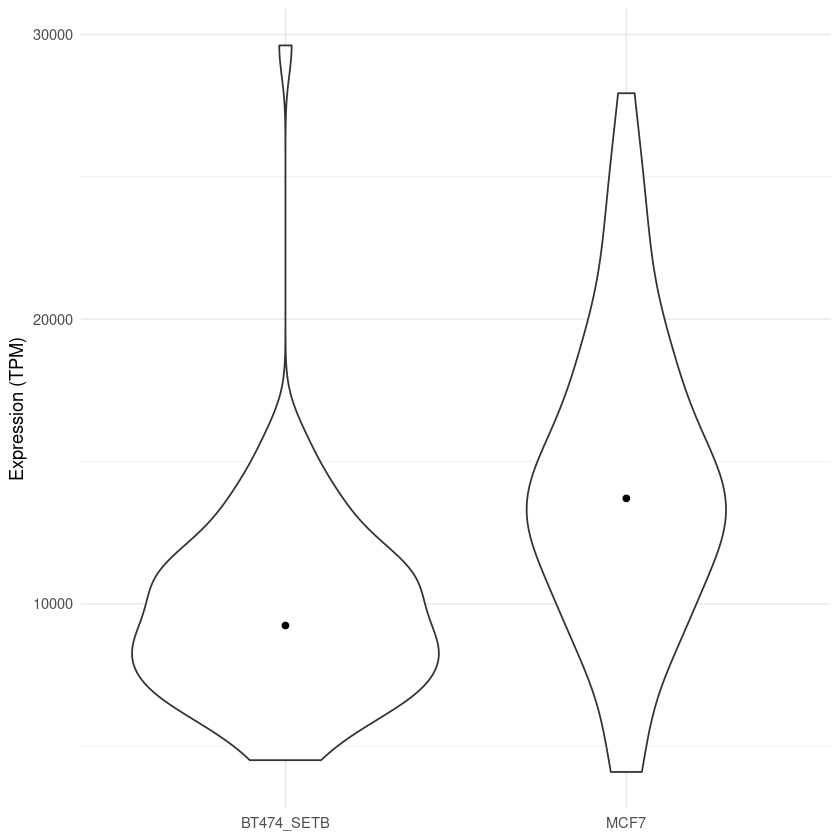

In [22]:
p <- ggplot(plot, aes(x=cell_line, y=ENSG00000075624)) + 
  geom_violin() + labs(x = NULL, y = "Expression (TPM)") +
    theme(axis.title.y = element_text(vjust = 2, size = 15), axis.text.y = element_text(size = 15),
         axis.text.x = element_text(size = 15)) +
            stat_summary(fun=median, geom="point", color="black") + theme_minimal()

p

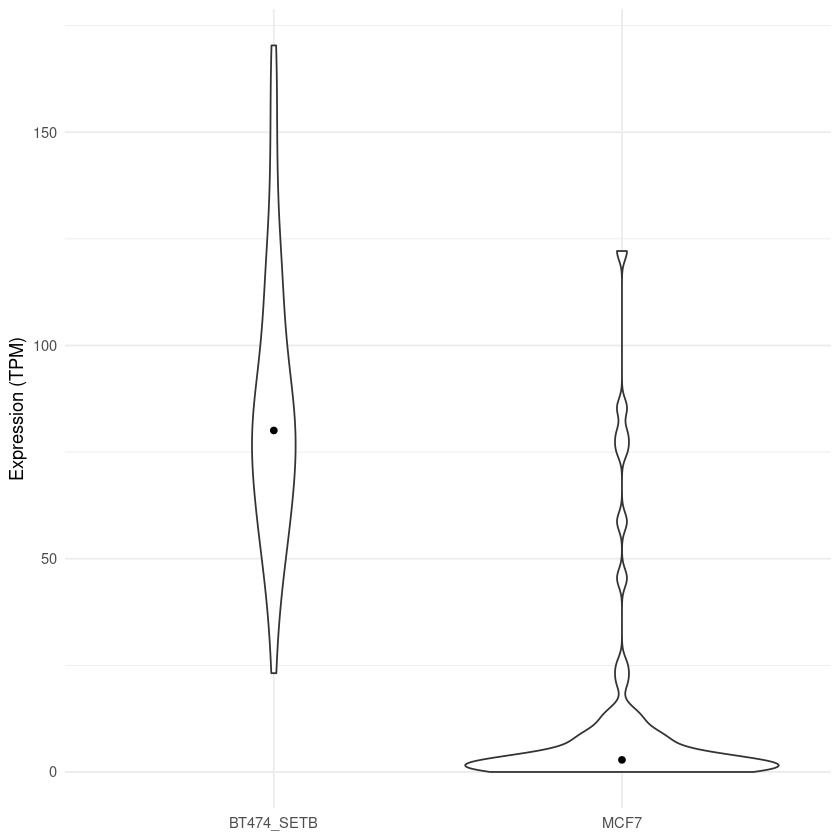

In [23]:
p <- ggplot(plot, aes(x=cell_line, y=ENSG00000141736)) + 
  geom_violin() + labs(x = NULL, y = "Expression (TPM)") +
    theme(axis.title.y = element_text(vjust = 2, size = 15), axis.text.y = element_text(size = 15),
         axis.text.x = element_text(size = 15)) +
            stat_summary(fun=median, geom="point", color="black") + theme_minimal()

p

In [24]:
mtx["geneID"] <- rownames(mtx)
colnames(tx2gene) <- c("txid", "geneid", "genename")
#left_join(mtx, tx2gene, by=c("geneID"="geneid"))

In [25]:
mtx

,A11_S177,A11_S81,A12_S185,A2_S105,A2_S9,A3_S113,A3_S17,A4_S121,A5_S129,A5_S33,⋯,H4_S128,H4_S32,H5_S136,H6_S144,H7_S152,H7_S56,H8_S64,H9_S168,H9_S72,geneID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003,4.33585616,22.61601845,9.0698635,2.1744584,11.0574709,9.34316277,21.8367249,4.3064717,11.0692110,15.05596745,⋯,11.9424161,33.8008838,10.6085130,6.38010686,7.6790550,23.84989612,28.6666288,4.92499837,12.6395792,ENSG00000000003
ENSG00000000005,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,ENSG00000000005
ENSG00000000419,133.48725991,35.59824113,64.1929042,105.3755085,55.6791285,136.72047966,126.6049760,41.5195454,102.8306580,68.72198725,⋯,120.6123604,66.2235052,85.4858526,85.26512367,121.3399792,53.45691710,97.4875088,103.14397790,118.1992093,ENSG00000000419
ENSG00000000457,7.12252747,0.25741066,10.9647447,1.3675940,0.1137940,2.69532167,3.2443538,6.9085652,3.8523021,0.04396277,⋯,3.5852663,0.2980662,10.2809674,0.00000000,1.9278649,6.11939389,1.2816872,7.07469002,2.4290219,ENSG00000000457
ENSG00000000460,30.07040972,0.00000000,18.8858178,16.4279787,0.4380121,18.04030263,8.5889640,7.1647130,14.9454394,1.97418975,⋯,4.1453308,8.4527154,3.0855378,0.13156530,5.4093665,0.52507495,0.9576304,2.02987463,0.9738915,ENSG00000000460
ENSG00000000938,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,ENSG00000000938
ENSG00000000971,0.00000000,0.00000000,1.0122466,0.0000000,0.0000000,0.62985383,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,ENSG00000000971
ENSG00000001036,18.34318898,11.01254333,16.5247187,19.0949528,74.7504987,14.33675512,74.5885021,37.1882833,18.0581557,84.78896895,⋯,17.0600621,119.7744143,7.3611440,15.48548767,7.7342764,76.16423841,108.0299562,12.53127886,69.8189047,ENSG00000001036
ENSG00000001084,1.20811227,21.19368406,4.9232451,1.6984249,4.7103377,3.17715798,2.6852603,0.0000000,0.0000000,0.95445377,⋯,1.6525354,28.1201263,6.2316942,5.36635339,10.3829211,20.65542470,4.6464495,3.87091462,0.0000000,ENSG00000001084


In [26]:
cols <- c("SYMBOL", "GENENAME")
mtx["geneid"] = rownames(mtx)
mtx <- left_join(mtx, select(org.Hs.eg.db, keys=rownames(mtx), columns=cols, keytype="ENSEMBL"), by=c("geneid"="ENSEMBL"))
mtx

'select()' returned 1:many mapping between keys and columns



A11_S177,A11_S81,A12_S185,A2_S105,A2_S9,A3_S113,A3_S17,A4_S121,A5_S129,A5_S33,⋯,H6_S144,H7_S152,H7_S56,H8_S64,H9_S168,H9_S72,geneID,geneid,SYMBOL,GENENAME
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
4.33585616,22.61601845,9.0698635,2.1744584,11.0574709,9.34316277,21.8367249,4.3064717,11.0692110,15.05596745,⋯,6.38010686,7.6790550,23.84989612,28.6666288,4.92499837,12.6395792,ENSG00000000003,ENSG00000000003,TSPAN6,tetraspanin 6
0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,ENSG00000000005,ENSG00000000005,TNMD,tenomodulin
133.48725991,35.59824113,64.1929042,105.3755085,55.6791285,136.72047966,126.6049760,41.5195454,102.8306580,68.72198725,⋯,85.26512367,121.3399792,53.45691710,97.4875088,103.14397790,118.1992093,ENSG00000000419,ENSG00000000419,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic"
7.12252747,0.25741066,10.9647447,1.3675940,0.1137940,2.69532167,3.2443538,6.9085652,3.8523021,0.04396277,⋯,0.00000000,1.9278649,6.11939389,1.2816872,7.07469002,2.4290219,ENSG00000000457,ENSG00000000457,SCYL3,SCY1 like pseudokinase 3
30.07040972,0.00000000,18.8858178,16.4279787,0.4380121,18.04030263,8.5889640,7.1647130,14.9454394,1.97418975,⋯,0.13156530,5.4093665,0.52507495,0.9576304,2.02987463,0.9738915,ENSG00000000460,ENSG00000000460,C1orf112,chromosome 1 open reading frame 112
0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,ENSG00000000938,ENSG00000000938,FGR,"FGR proto-oncogene, Src family tyrosine kinase"
0.00000000,0.00000000,1.0122466,0.0000000,0.0000000,0.62985383,0.0000000,0.0000000,0.0000000,0.00000000,⋯,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,ENSG00000000971,ENSG00000000971,CFH,complement factor H
18.34318898,11.01254333,16.5247187,19.0949528,74.7504987,14.33675512,74.5885021,37.1882833,18.0581557,84.78896895,⋯,15.48548767,7.7342764,76.16423841,108.0299562,12.53127886,69.8189047,ENSG00000001036,ENSG00000001036,FUCA2,alpha-L-fucosidase 2
1.20811227,21.19368406,4.9232451,1.6984249,4.7103377,3.17715798,2.6852603,0.0000000,0.0000000,0.95445377,⋯,5.36635339,10.3829211,20.65542470,4.6464495,3.87091462,0.0000000,ENSG00000001084,ENSG00000001084,GCLC,glutamate-cysteine ligase catalytic subunit


In [29]:
write_csv(mtx[,c(132,133,134,1:130)], "./kallisto_TPM.csv")